<a href="https://colab.research.google.com/github/eser1303/Vizualization/blob/main/Vizualization_EF_HV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#!pip install wget
#import wget
import matplotlib.pyplot as plt
import networkx as nx
import array

In [46]:
%cd /content/
!ls 
!rm -r tree_exmp/
!git clone https://github.com/eser1303/Vizualization tree_exmp
%cd tree_exmp/

/content
drive  motion-co-seg  sample_data  tree-42n.xml  tree_exmp
Cloning into 'tree_exmp'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.
/content/tree_exmp


In [12]:
def find_root(G,child):
   parent = list(G.predecessors(child))
   if len(parent) == 0:
      return child
   else:  
      return find_root(G, parent[0])

def HV(G, pre_root, posit, add_w, add_h):
   children = list(G.successors(pre_root))
   add_left = add_w
   add_right = add_w
   if len(children) > 0:
      posit, add_left = HV(G, children[0], posit, add_w, add_h + 1)
   if len(children) > 1:
      posit, add_right = HV(G, children[1], posit, add_left + 1, add_h)
   posit[pre_root] = array.array('d', [add_w, add_h])
   return posit, max(add_left, add_right)

def posit_y_reverse(G, posit):
   posit_rev = dict.fromkeys(list(G.nodes()))
   for i in posit:
      posit_rev[i] = array.array('d', [posit[i][0], -posit[i][1]])
   return posit_rev

def posit_y_trans(G, posit):
   posit_rev = dict.fromkeys(list(G.nodes()))
   for i in posit:
      posit_rev[i] = array.array('d', [posit[i][0], - posit[i][0] + posit[i][1]])
   return posit_rev
def posit_rotate(G, posit):
   posit_rev = dict.fromkeys(list(G.nodes()))
   for i in posit:
      posit_rev[i] = array.array('d', [posit[i][0] + posit[i][1], - posit[i][0] + posit[i][1]])
   return posit_rev

In [52]:
filename = 'tree-13n.xml'
filename = 'tree-42n.xml'
filename = 'tree-84n.xml'
filename = 'tree-60n.xml'
G = nx.DiGraph()
G = nx.read_graphml(filename)
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))

List of all nodes:  ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59']
List of all edges:  [('n0', 'n1', {}), ('n0', 'n48', {}), ('n1', 'n2', {}), ('n1', 'n11', {}), ('n2', 'n3', {}), ('n2', 'n6', {}), ('n3', 'n4', {}), ('n3', 'n5', {}), ('n6', 'n7', {}), ('n7', 'n8', {}), ('n7', 'n9', {}), ('n9', 'n10', {}), ('n11', 'n12', {}), ('n11', 'n37', {}), ('n12', 'n13', {}), ('n12', 'n30', {}), ('n13', 'n14', {}), ('n13', 'n20', {}), ('n14', 'n15', {}), ('n14', 'n18', {}), ('n15', 'n16', {}), ('n16', 'n17', {}), ('n18', 'n19', {}), ('n20', 'n21', {}), ('n21', 'n22', {}), ('n21', 'n25', {}), ('n22', 'n23', {}), ('n23', 'n24', {}), ('n25', '

In [53]:
st = list(G.nodes())[0]
root = find_root(G, st)
posit = dict.fromkeys(list(G.nodes()))
posit, add_w = HV(G, root, posit, 0, 0)
posit = posit_y_reverse(G, posit)
posit2 = posit_y_trans(G, posit)
posit3 = posit_rotate(G, posit)

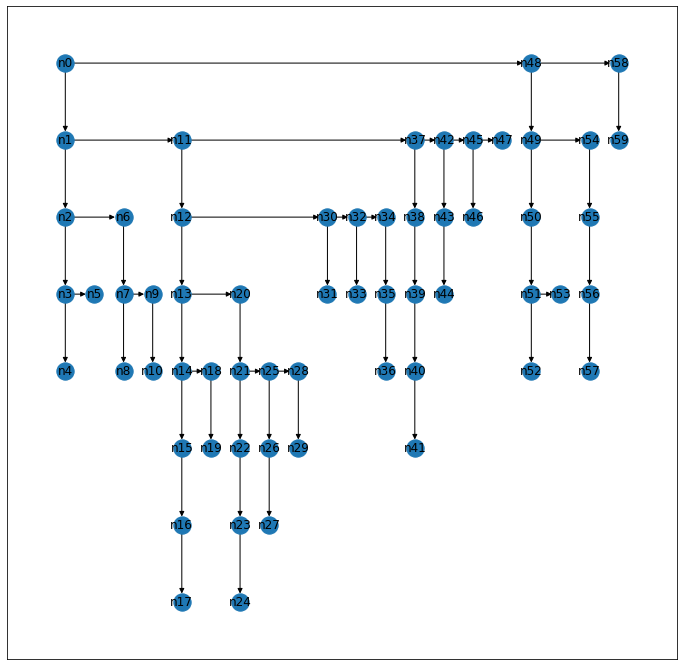

In [54]:
plt.figure(1,figsize=(12,12)) 
nx.draw_networkx(G,pos = posit)
plt.show()

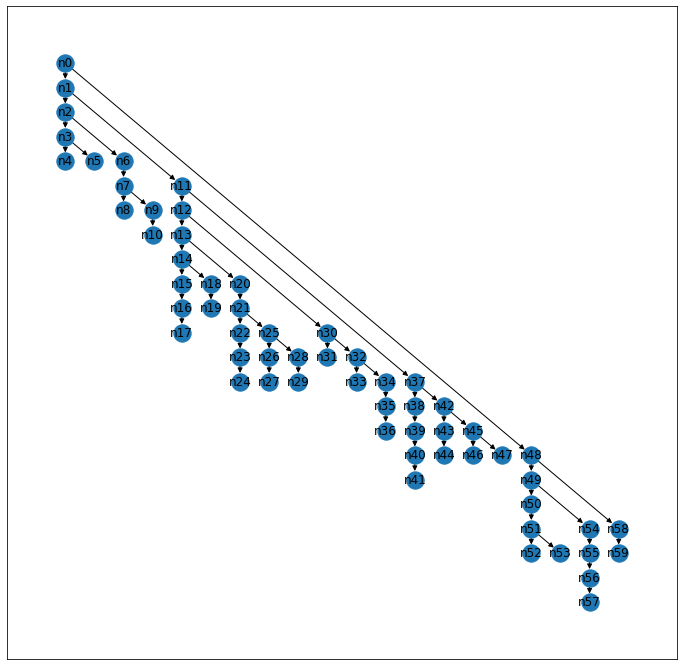

In [55]:
plt.figure(1,figsize=(12,12)) 
nx.draw_networkx(G,pos = posit2)
plt.show()

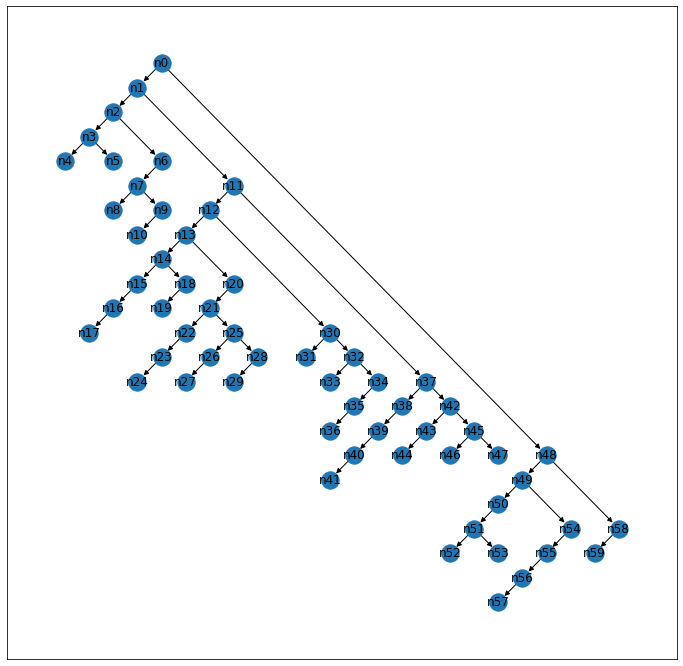

In [56]:
plt.figure(1,figsize=(12,12)) 
nx.draw_networkx(G,pos = posit3)
plt.show()